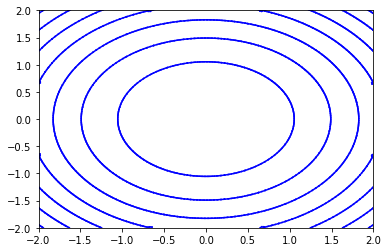

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x,y):
    return x**2 + y**2
#   return math.exp(-(x**2+y**2))*math.cos(x*y)

def reta(t,px,py,qx,qy):
    return px+t*(qx-px), py+t*(qy-py)

def bissecao(f,c,px,py,qx,qy,N):
    a = 0.0
    b = 1.0
    ax,ay = reta(a,px,py,qx,qy)
    bx,by = reta(b,px,py,qx,qy)
    m = (a+b)/2.0
    mx,my = reta(m,px,py,qx,qy)
    fa = f(ax,ay)-c
    fb = f(bx,by)-c
    fm = f(mx,my)-c
    for i in range(N):
        if (fa*fm < 0.0):
            b  = m
            fb = fm
        elif (fb*fm < 0.0):
            a  = m
            fa = fm
        else:
            break
        m  = (a+b)/2.0
        mx,my = reta(m,px,py,qx,qy)
        fm = f(mx,my)-c
    return mx,my

def triangleintersect(f,c,ax,ay,bx,by,cx,cy,N):
    fa = f(ax,ay)-c
    fb = f(bx,by)-c
    fc = f(cx,cy)-c
    p  = []
    if (fa*fb <= 0.0):
        p.append(bissecao(f,c,ax,ay,bx,by,N))
    if (fb*fc <= 0.0):
        p.append(bissecao(f,c,bx,by,cx,cy,N))
    if (fc*fa <= 0.0):
        p.append(bissecao(f,c,cx,cy,ax,ay,N))
    return p

def levelcurves(f,cmin,cmax,xmin,xmax,ymin,ymax,lc,m,n,NB):
    deltax = (xmax - xmin)/(m-1)
    deltay = (ymax - ymin)/(n-1)
    deltac = (cmax - cmin)/(lc-1)
    for k in range(lc):
        l = []
        c = cmin + k*deltac
        for i in range(n):
            x0 = xmin + i*deltax
            x1 = x0 + deltax
            for j in range(m): 
                y0 = ymin + j*deltay
                y1 = y0 + deltay
                aresta = triangleintersect(f,c,x0,y0,x1,y0,x1,y1,NB)
                if (aresta != []):
                    l.append(aresta)
                aresta = triangleintersect(f,c,x0,y0,x1,y1,x0,y1,NB)
                if (aresta != []):
                    l.append(aresta)
        for i in range(len(l)):
            px = []
            py = [] 
            for j in range(len(l[i])):
                px.append(l[i][j][0])
                py.append(l[i][j][1])
            plt.plot(px,py,color='blue')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

levelcurves(f,0.0,10.0,-2.0,2.0,-2.0,2.0,10,100,100,20)

In [ ]:
2+1